# Introduction

In this exercise, you will create and submit predictions for a Kaggle competition. You can then improve your model (e.g. by adding features) to apply what you've learned and move up the leaderboard.

Begin by running the code cell below to set up code checking and the filepaths for the dataset.

In [17]:
# Import helpful libraries
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
import seaborn as sns
import os

# Set up filepaths
f = open("basePath.txt") # basePath.txt contains machine base file path
basePath = f.read()
f.close()

train_path =  basePath + "/home-data-for-ml-course/input/train.csv" 
test_path  =  basePath + "/home-data-for-ml-course/input/test.csv"


# Load the data, and separate the target

X_full = pd.read_csv(train_path,index_col='Id')
X_test_full = pd.read_csv(test_path,index_col='Id')
y = X_full.SalePrice

# Create X (After completing the exercise, you can return to modify this line!)
# features = ['LotArea', 'YearBuilt', '1stFlrSF', '2ndFlrSF', 'FullBath', 'BedroomAbvGr', 'TotRmsAbvGrd','OverallQual','OverallCond','MSSubClass']
features = ['LotArea', 'YearBuilt', '1stFlrSF', '2ndFlrSF', 'FullBath', 'BedroomAbvGr', 'TotRmsAbvGrd']

# Select columns corresponding to features, and preview the data
X = X_full[features].copy()
X_test = X_test_full[features].copy()

# Split into validation and training data
X_train, X_valid, y_train, y_valid = train_test_split(X, y, train_size=0.8, test_size=0.2,random_state=0)

In [16]:
X_train.head()

,LotArea,YearBuilt,1stFlrSF,2ndFlrSF,FullBath,BedroomAbvGr,TotRmsAbvGrd
Id,,,,,,,
619,11694,2007,1828,0,2,3,9
871,6600,1962,894,0,1,2,5
93,13360,1921,964,0,1,2,5
818,13265,2002,1689,0,2,3,7
303,13704,2001,1541,0,2,3,6


In [25]:
# Define the models
model_1 = RandomForestRegressor(n_estimators=50, random_state=0)
model_2 = RandomForestRegressor(n_estimators=100, random_state=0)
model_3 = RandomForestRegressor(n_estimators=100, criterion='absolute_error', random_state=0)
model_4 = RandomForestRegressor(n_estimators=200, min_samples_split=20, random_state=0)
model_5 = RandomForestRegressor(n_estimators=100, max_depth=7, random_state=0)

models = [model_1, model_2, model_3, model_4, model_5]

In [48]:
def score_model(model, X_t=X_train, X_v=X_valid, y_t=y_train, y_v=y_valid):
    model.fit(X_t, y_t)
    preds = model.predict(X_v)
    return mean_absolute_error(y_v, preds)

mae = {}
for i in range(0, len(models)):
    mae[i] = score_model(models[i])
    print("Model %d MAE: %d" % (i+1, mae[i]))

Model 1 MAE: 24015
Model 2 MAE: 23740
Model 3 MAE: 23528
Model 4 MAE: 23996
Model 5 MAE: 23706


In [49]:
min(mae, key=mae.get)

2

In [51]:
# Create new random forest model
my_model = RandomForestRegressor(n_estimators=100, criterion='absolute_error', random_state=0)

# Fit model to test data
my_model.fit(X,y)

# Generate predictions from test dataScience
preds_test = my_model.predict(X_test)

# Save predictions in format used for scoring
output = pd.DataFrame({'Id': X_test.index,'SalePrice': preds_test})
output.to_csv('submission.csv', index=False)

output.head()

,Id,SalePrice
0,1461,119433.08
1,1462,158367.50
2,1463,185351.21
3,1464,178343.12
4,1465,192898.29


<AxesSubplot:xlabel='1stFlrSF', ylabel='SalePrice'>

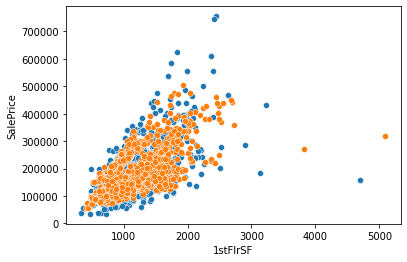

In [54]:
sns.scatterplot(x=X_full['1stFlrSF'],y=X_full.SalePrice)
sns.scatterplot(x=X_test['1stFlrSF'],y=preds_test)